In [1]:
#utility functions 

import pandas as pd
import numpy as np
def saveplot(name):   
    
    subdirectory = "experiments"
    path = os.path.join(os.getcwd(), subdirectory)
    filepath = os.path.join(path, name)

    # for Figure plotting
    fig, ax = plt.subplots()
    # Set the x and y limits of the axes
    ax.set_xlim([limit1, limit2])
    ax.set_ylim([limit1, limit2])

    # Plot the points on the axis
    # ax.scatter(x_coords, y_coords)
    for i in range(num_points):
        ax.scatter(x_coords[i], y_coords[i])
        ax.annotate(point_labels[i], (x_coords[i], y_coords[i]))

    # Add gridlines
    ax.grid(True)

    # Set the title and axis labels
    ax.set_title(f"Random Points on Cartesian Plane ({num_points} points)")
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
      
    plt.savefig(filepath)
    

def savedata(data, name):
    
    subdirectory = "experiments"
    path = os.path.join(os.getcwd(), subdirectory)
    filepath = os.path.join(path, name)
    
    df = pd.DataFrame(data)
    df.columns = df.columns + 1

    # Save the DataFrame to an Excel file
    df.to_excel(filepath, index=False)
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

num_points = 20
radius = 4.00
limit1 = -10
limit2 = 10

In [3]:
import os
# Play a notification sound
notification_sound = "program_completed.wav"  # audio file name, just for a notification sound if long running program completes
# os.system(f"afplay {notification_sound}")

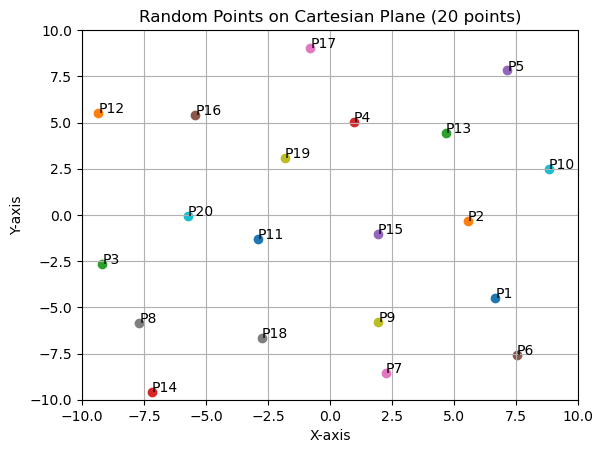

In [4]:
import numpy as np
import random
# # # generating random x and y coordinates of the tags with values between-15 to 15, for 20 points
# x_coords = np.random.uniform(limit1, limit2, 20)
# y_coords = np.random.uniform(limit1, limit2, 20)

# #0
# x_coords = [ -5.32463153,  -8.76051415,  -1.15636462,   2.19195406,   3.21037006,
#   14.11990191, -14.26377168, -12.93228116,   2.58042298,   5.93712745,
#    8.08366368,   9.57134564,  -2.85396558, -13.11097522,  -7.59629256,
#   -4.24879346,  -3.31284688,  -9.70391303,   6.36873875,  10.41085005]
# y_coords = [-14.2935121,    5.67973811,   4.08538733,  -3.04254408,   4.14224576,
#    8.74004094, -10.90073777,  -2.88978037,  -9.26896965, -14.57394033,
#   -4.0107698,   13.50963778,  -2.72081589,   4.94863212,   3.07360091,
#  -12.12926027,   8.99771014, -13.81522331,   4.15886645,   9.65946393]

# #0
# x_coords = [ -3.32463153,  -8.76051415,  -1.15636462,   2.19195406,   4.21037006,
#               14.11990191, -14.26377168, -12.93228116,   2.58042298,   7.93712745,
#                8.08366368,   4.57134564,  -2.85396558, -13.11097522,  -7.59629256,
#               -8.24879346,  -3.31284688,  -9.70391303,   8.36873875,  10.41085005]


# y_coords = [-10.2935121,    10.67973811,   4.08538733,  -3.04254408,   2.14224576,
#            0.74004094, -10.90073777,  -2.88978037,  -9.26896965, -12.57394033,
#           -4.0107698,   9.50963778,  -2.72081589,   4.94863212,   3.07360091,
#         -7.12926027,   8.99771014, -13.81522331,   4.15886645,   9.65946393]

x_coords = [ 6.67553696,  5.56248438, -9.18074366,  0.9637898 ,  7.14652792,
        7.52474579,  2.2664814 , -7.68035985,  1.94498735,  8.82009056,
       -2.91469677, -9.34194326,  4.66801598, -7.1832906 ,  1.92059631,
        -5.42397472, -0.78271589, -2.73722603, -1.82706266, -5.71700452]

y_coords = [-4.50093563, -0.32506474, -2.62871251,  5.01814577,  7.81549116,
       -7.58593212, -8.52747714, -5.85236663, -5.80360944,  2.50424634,
       -1.27889007,  5.50168414,  4.44712347, -9.55771646, -1.01676636,
        5.40563574,  9.05344699, -6.636382  ,  3.08057889, -0.05405063]

point_labels = [f"P{i + 1}" for i in range(num_points)]


# for Figure plotting
fig, ax = plt.subplots()
# Set the x and y limits of the axes
ax.set_xlim([limit1, limit2])
ax.set_ylim([limit1, limit2])

# Plot the points on the axis
# ax.scatter(x_coords, y_coords)
for i in range(num_points):
    ax.scatter(x_coords[i], y_coords[i])
    ax.annotate(point_labels[i], (x_coords[i], y_coords[i]))

# Add gridlines
ax.grid(True)

# Set the title and axis labels
ax.set_title(f"Random Points on Cartesian Plane ({num_points} points)")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
#plt.savefig("/myfolder/myplot.jpg")


# Show the plot
plt.show()

In [5]:
# display(x_coords)
# display(y_coords)

In [6]:
# import random

# # function to select nodes requesting to transmit their messages.
# def select_nodes():
#     nodes = [random.uniform(0,1) for _ in range(num_points + 1)]  
#     nodes = [0 if v < 0.4 else 1 for v in nodes]
#     nodes[0] = 0  #X[0] is default 0 to make 1-based indexing
#     return nodes

import math
import random

# function to select nodes requesting to transmit their messages.
def select_nodes():
    num_of_nodes = math.ceil(random.uniform(0,1) * num_points)
    indexes = list(range(1, num_points + 1))
    #print(indexes)
    
    #print(num_of_nodes)
    selected_indexes = random.sample(indexes, num_of_nodes)
    
    #print(selected_indexes)
    nodes = [0 for i in range (num_points + 1)]
    
    for num in selected_indexes:
        nodes[num] = 1
        
    #print(nodes)
    return nodes

# import random

# # function to select nodes requesting to transmit their messages.
# def select_nodes():
#     nodes = [1 for _ in range(num_points + 1)]  
    
#     nodes[0] = 0  #X[0] is default 0 to make 1-based indexing
#     return nodes

In [7]:
import numpy as np

# function to select destination nodes, for the nodes which want to transmit
def select_destinations(X_vec):
    
    dest = [0 for i in range (num_points + 1)]
    selected_nodes = [i for i, x in enumerate(X_vec) if x == 1]
    
    for node in selected_nodes:
        neighbors = np.array(neighbor_table.loc[f"P{node}"])
        neighbor_indices = np.where(neighbors == 1)[0]
        if len(neighbor_indices) > 0:
            random_neighbor = np.random.choice(neighbor_indices) + 1
            dest[node] = random_neighbor
        else:
            pass
        
    return dest

In [8]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

def get_dist_matrix(x_coords_loc, y_coords_loc):
    
    points = [(x_coords_loc[i], y_coords_loc[i]) for i in range(num_points)]
    distances = pdist(points)
    dist_mat = squareform(distances)
    dist_mat = pd.DataFrame(dist_mat, columns = point_labels, index = point_labels)
    
    return dist_mat

In [9]:
def get_neighbor_table(dist_mat):
    neighbor_tbl = dist_mat
    neighbor_tbl = neighbor_tbl.applymap(lambda x : 1000000 if x > radius else 1)

    for i in range(num_points):
        neighbor_tbl.at[f"P{i + 1}", f"P{i + 1}"] = 0
    
    return neighbor_tbl

In [10]:
def define_c3(dst, neighbor):
    constraint = []
    
    for i in range(len(dst)):
        str = []
        
        if(dst[i] > 0): 
            ind = dst[i]
            
            str.append(ind)   #destination can't transmit also
            
            for j in range(num_points):
                if(neighbor[f"P{ind}"][f"P{j + 1}"] == 1 and j != i - 1):
                    str.append(j + 1)
                    
            constraint.append(str)
            
        else:
            constraint.append('')
        
    return  constraint

In [11]:
import sys
import itertools

def solve_instance(d, c):          #updated the parameters
    
    indexes = [i for i, num in enumerate(d) if num > 0]
    combinations = []
    result = None
    unique_combinations = []
    
      
    for size in range(len(indexes), 0, -1):
        #genetating all combination such that any 1 node finally transmits , or 2 nodes and so on.
        #and these combinations will be checked if they satisfy the constraints
        combinations = itertools.combinations(indexes, size)
        
               
        for combination in combinations:
            valid_comb = True
            for elem in combination:          # EACH element of combination should satisfy the consrtaints
                intersection = set(c[elem]).intersection(set(combination))
                if(len(intersection) > 0):
                    valid_comb = False
                    break
                              
            
            if(valid_comb):                            #for stopping the loop when valid combination found
                result = combination
                break  
            
                       
        if(result != None and len(result) > 0):    #for stopping the loop when valid combination found
            break
                        
    
    return list(result)


In [12]:
import numpy as np
def generate_data(rows):

    data_X = []
    data_y = []

    i = 0
    
    #for i in range(rows):
    while i < rows:
        X = select_nodes()
        
        #print(i, end= " ")
        
        D = select_destinations(X)
        
        if(sum(D) == 0):    #ignoring the case when 1 node transmits and has no neighbor.
            continue
            
        #D = [0, 5, 0, 11, 16, 1, 2, 3, 13, 13, 14, 0, 15, 9, 0, 16, 14, 6, 4, 2, 11]
        
        C3 = define_c3(D, neighbor_table)
        #print(f"C3  {C3}")
        
        sol = solve_instance(D,C3)
        
        #print(f" sol is {sol}")
        
        data_X.append(D[1:])
        
        
        y_var = [0 for i in range (num_points)]
        
        for j in sol:
            y_var[j - 1] = 1
            
        data_y.append(y_var)
        
        i += 1
    
    x_var = np.array(data_X)
    y_var = np.array(data_y)
    
    return x_var, y_var


#data.at[i, 'Solution'] = sol
#data.at[i, 'Instance'] = D[1:]
    
#data = pd.DataFrame(columns=['Instance', 'Solution'], index=[i for i in range(rows)])
#     df.loc[0, 'X'] = X
#     df.loc[0, 'Y'] = Y

In [13]:
def accuracy_function(pred_solution, test_solution):
    # Compare each pair of rows
    elementwise_comparison = (pred_solution == test_solution)

    # Count the number of equal elements in each pair
    equal_counts = np.sum(elementwise_comparison, axis=1)

#     print("Number of equal elements in each pair of rows:")
#     print(equal_counts)

    average = np.sum(equal_counts, axis = 0) / (pred_solution.shape[0] * pred_solution.shape[1])
    
    return average
  

In [14]:
# def accuracy_function2(pred_solution, test_solution):
#     # Compare each pair of rows
#     elementwise_comparison = (pred_solution == test_solution)
    
#     # Check if all elements in each row are True (i.e., rows are the same)
#     rowwise_comparison = np.all(elementwise_comparison, axis=1)


#     num_same_rows = np.sum(rowwise_comparison)

#     average = num_same_rows / (pred_solution.shape[0])
    
#     return average

In [15]:
# Function to generate a new position specifi units away in a random direction
def new_position(x, y, distance):
    dx = random.uniform(-1, 1)  # Random value between -1 and 1
    dy = random.uniform(-1, 1)  # Random value between -1 and 1
    norm = (dx**2 + dy**2)**0.5
    scale = distance / norm
    new_x = x + scale * dx
    new_y = y + scale * dy
    return new_x, new_y
    
def move_nodes(num_points_to_move): 
#   Randomly select  points to move
    selected_indices = random.sample(range(len(x_coords)), num_points_to_move)
    print([(item + 1) for item in selected_indices])
    
    non_selected_indices = [i for i in range(len(x_coords)) if i not in selected_indices]
    print([(item + 1) for item in non_selected_indices])

    # Update the selected points with new positions
    for index in selected_indices:
        x_new, y_new = new_position(x_coords[index], y_coords[index], 2)
        
        #conditions such that point remain within boundaries
        if(x_new < limit1):
            x_new += (2*limit2)
        elif(x_new > limit2):
            x_new -= (2*limit2)
            
        if(y_new < limit1):
            y_new += (2*limit2)
        elif(y_new > limit2):
            y_new -= (2*limit2)
            
        x_coords[index] = x_new
        y_coords[index] = y_new
        
    for index in non_selected_indices:
        x_new, y_new = new_position(x_coords[index], y_coords[index], 10)
        print(x_new)
        print(y_new)
        #conditions such that point remain within boundaries
        if(x_new < limit1):
            x_new += (2*limit2)
        elif(x_new > limit2):
            x_new -= (2*limit2)
            
        if(y_new < limit1):
            y_new += (2*limit2)
        elif(y_new > limit2):
            y_new -= (2*limit2)
            
        x_coords[index] = x_new
        y_coords[index] = y_new
            
#         if(abs(x_new) > 15):
#             x_coords[index] = x_coords[index] - (x_new - x_coords[index])
#         else:
#             x_coords[index] = x_new

#         if(abs(y_new) > 15):
#             y_coords[index] = y_coords[index] - (y_new - y_coords[index])
#         else:
#             y_coords[index] = y_new


In [16]:
pd.set_option('display.max_colwidth', None)
np.set_printoptions(threshold=np.inf)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

def generate_configurations(num_iterations, num_samples):
    
    prefix_x = "X"
    prefix_y = "y"
    
    for iteration in range(1, num_iterations + 1):
        
        move_nodes(10)
        print(x_coords)
        print(y_coords)
        global dist_matrix
        global neighbor_table
        dist_matrix = get_dist_matrix(x_coords, y_coords)
        neighbor_table = get_neighbor_table(dist_matrix)
        
        print(neighbor_table)
        
        global_X = prefix_x + str(iteration)
        global_y = prefix_y + str(iteration)
      
        saveplot(f"Conf{iteration}.jpg")
        
        globals()[global_X], globals()[global_y] = generate_data(num_samples)
        
        savedata(globals()[global_X], f"Instance{iteration}.xlsx")
        savedata(globals()[global_y], f"Solution{iteration}.xlsx")
        
        print(f"Created  configuration {iteration}")
    


In [18]:
# building the classifier.

from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

def generate_predictions(num_iterations):
    
    prefix_x = "X"
    prefix_y = "y"
    global_test = prefix_x + "test"
    X_test_1 = globals()[global_test]
  
    
    
    for iteration in range(0, num_iterations + 1):
        global_X = prefix_x + str(iteration)
        global_y = prefix_y + str(iteration)
        
        X_set_1  = globals()[global_X]
        y_set_1  = globals()[global_y]
        # Define the classifier
        clf = MultiOutputClassifier(DecisionTreeClassifier(random_state=42, max_depth = 16, min_samples_leaf=4,
                                                   min_samples_split = 16))

        # Train the classifier
        clf.fit(X_set_1, y_set_1)
        
#         score = clf.score(X_set_1, y_set_1)
#         print('Train Accuracy:', score)
        
#         score = clf.score(X_test_1, ytest)
#         print('Test Accuracy:', score)
        
        prediction = f"Sol{iteration}"
        globals()[prediction] = clf.predict(X_test_1)
        
        savedata(globals()[prediction], f"Prediction{iteration}.xlsx")
        print(f"prediction generated {iteration}")
        
        
        
  

In [19]:
def apply_algo(num_iterations):
    
    prefix0 = "Sol0"
    sol_0 = globals()[prefix0]
    
    prefix_a = "sol_alpha"
    
    for iteration in range(1, 10):
        sol_alpha_final =  prefix_a + str(iteration)
        sol_alpha = sol_0
        for i in range(1, num_iterations + 1):
            sol_current = f"Sol{i}"
            selected_array = globals()[sol_current]
            sol_alpha = (iteration * 0.1) * sol_alpha + (1 - (iteration * 0.1)) * selected_array
        print(f"alpha multiplication vector generated {sol_alpha_final}")   
        
        globals()[sol_alpha_final] = sol_alpha
        
        savedata(sol_alpha, f"Alpha_{iteration}Prediction.xlsx")
        
   

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20
P1,0,1000000,1000000,1000000,1000000,1,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
P2,1000000,0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1,1000000,1000000,1000000,1000000,1000000
P3,1000000,1000000,0,1000000,1000000,1000000,1000000,1,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
P4,1000000,1000000,1000000,0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1,1000000,1000000,1000000,1000000,1000000,1,1000000
P5,1000000,1000000,1000000,1000000,0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
P6,1,1000000,1000000,1000000,1000000,0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
P7,1000000,1000000,1000000,1000000,1000000,1000000,0,1000000,1,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
P8,1000000,1000000,1,1000000,1000000,1000000,1000000,0,1000000,1000000,1000000,1000000,1000000,1,1000000,1000000,1000000,1000000,1000000,1000000
P9,1000000,1000000,1000000,1000000,1000000,1000000,1,1000000,0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
P10,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000


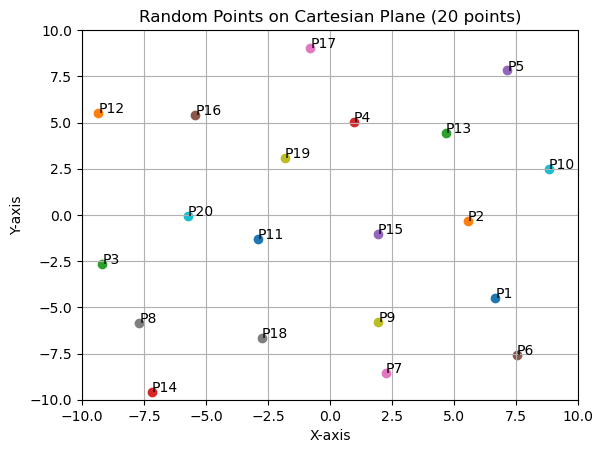

In [20]:
dist_matrix = get_dist_matrix(x_coords, y_coords)
neighbor_table = get_neighbor_table(dist_matrix)


saveplot(f"Conf0.jpg")
X0,y0 = generate_data(10)
savedata(X0, f"Instance0.xlsx")
savedata(y0, f"Solution0.xlsx")

# os.system(f"afplay {notification_sound}")

neighbor_table

In [ ]:
# for iteration in range(0, num_points + 1):
    
#     prefix_x = "Sol"

    
#     prediction = prefix_x + str(iteration)
   
    
#     sol = globals()[prediction]


#     savedata(sol, f"Prediction{iteration}.xlsx")


#     for iteration in range(3, num_points + 1):
    
#     prefix_x = "X"
#     prefix_y = "y"
    
#     global_X = prefix_x + str(iteration)
#     global_y = prefix_y + str(iteration)
    
#     X_set = globals()[global_X]
#     y_set = globals()[global_y]

#     savedata(X_set, f"Instance{iteration}.xlsx")
#     savedata(y_set, f"Solution{iteration}.xlsx")

# savedata(Xtest, f"InstanceTest.xlsx")
# savedata(ytest, f"SolutionTest.xlsx")


[14, 1, 6, 4, 11, 10, 5, 7, 19, 18]
[2, 3, 8, 9, 12, 13, 15, 16, 17, 20]
9.377035184896428
-9.5689385035725
0.17743707385506013
0.8961212949479642
-13.57323516064801
2.2268672800409215
-1.8725774778122357
3.4390199902785357
-3.7779263489535593
13.81081862041306
13.009730019365216
9.962176224548887
-6.643021317862846
-6.18052982512471
-12.144370631220129
-1.9995164391557942
3.3563769849779157
-0.049734331511016805
-9.953191725729328
9.004355298087741
[6.6521965980624715, 9.377035184896428, 0.17743707385506013, -0.933286130986819, 6.596069855079175, 5.702795141133092, 0.9746921781145879, 6.426764839351989, -1.8725774778122357, 8.82032066566883, -4.049061743270388, -3.7779263489535593, -6.990269980634784, -5.594750547673698, -6.643021317862846, 7.855629368779871, 3.3563769849779157, -4.68659790049264, -1.1552213312477408, -9.953191725729328]
[-2.501071827761301, -9.5689385035725, 0.8961212949479642, 5.651472630373453, 9.738248533867962, -8.410853833311906, 9.945669688859866, 2.22686728004

Created  configuration 3
[14, 17, 2, 7, 5, 20, 19, 8, 13, 18]
[1, 3, 4, 6, 9, 10, 11, 12, 15, 16]
-0.39801674819925204
-8.472319811111705
12.325616550135354
-10.488769559853974
-1.0195281315213434
0.21709538993644095
6.496397879823761
10.030624668327903
1.1210134388886104
-4.458502303945201
-9.987117140523157
-14.746686251242703
5.172307129850109
-9.02094754593984
0.5808609311511646
8.508891565345298
-13.0038490699975
-1.7109878553049107
4.55301161665262
-11.233375414096397
[-0.39801674819925204, 3.6244135741953856, -7.674383449864646, -1.0195281315213434, 5.658562924033722, 6.496397879823761, 0.8426540049613247, -6.935869389656793, 1.1210134388886104, -9.987117140523157, 5.172307129850109, 0.5808609311511646, 6.189497045777808, 9.363766777246093, 6.9961509300025, 4.55301161665262, 2.1133418936881387, 8.61755444306551, 3.7071001097903054, -0.7369827893224459]
[-8.472319811111705, 4.930081949840999, 9.511230440146026, 0.21709538993644095, -8.482256918728442, -9.969375331672097, -5.73165

Created  configuration 5
[8, 13, 16, 9, 1, 10, 3, 5, 7, 20]
[2, 4, 6, 11, 12, 14, 15, 17, 18, 19]
-1.9349453751472367
-3.5317670678105566
6.362484586209787
7.772875349297554
0.4223977063313322
15.420671554608914
0.8232793766292872
-15.793659359514468
-2.456665227441124
-7.743996991211723
9.053487218204177
2.9561725676204507
5.5676232196971736
-9.4731238513122
5.578497570541675
17.307940547652876
5.011274687480379
-8.449517814972511
-6.088772161476508
-2.493411574114674
[-2.794905767273243, -1.9349453751472367, 4.213963435708038, 6.362484586209787, 7.539805278339193, 0.4223977063313322, 3.76394924443895, -6.0178484994240256, 1.189189243271685, -1.1158266043505474, 0.8232793766292872, -2.456665227441124, 6.524251085337346, 9.053487218204177, 5.5676232196971736, -6.394777029780071, 5.578497570541675, 5.011274687480379, -6.088772161476508, 8.274875725590984]
[-8.24537324071972, -3.5317670678105566, 0.831517724550034, 7.772875349297554, -9.926625334283983, -4.579328445391086, -3.04136909543

Created  configuration 7
[16, 19, 2, 12, 3, 20, 6, 17, 5, 15]
[1, 4, 7, 8, 9, 10, 11, 13, 14, 18]
3.001905303615751
-14.064762910152403
4.1554913256472
-1.099082237873521
-11.881677845475503
-0.9350670332990205
-3.3222174964964983
-7.415373095454705
-10.560153984740973
-5.668085850013883
-0.8556880126458459
9.361205730226274
0.442107100098621
6.421952715081257
-0.6873476961795895
-14.283374608996002
5.1016753952624105
14.147662187584537
12.056507175567798
0.5783967074977481
[3.001905303615751, -2.009856661626639, 1.9482448572436013, 4.1554913256472, -5.482764325516419, 5.589363766226857, 8.118322154524497, -3.3222174964964983, 9.439846015259027, -0.8556880126458459, 0.442107100098621, -8.576065246845143, -0.6873476961795895, 5.1016753952624105, 8.966485586661463, 4.6373353670287205, 4.34574252203357, -7.943492824432202, -6.139002423645927, -1.1626624725361094]
[5.935237089847597, -1.0530488477551103, -0.07785266804472113, -1.099082237873521, -0.2280999869346716, 8.840702742461124, -0.9

Created  configuration 10
[4, 15, 10, 9, 18, 1, 16, 3, 19, 6]
[2, 5, 7, 8, 11, 12, 13, 14, 17, 20]
8.34998928213904
-0.11879520822387812
-5.586409532419184
-9.004602073736315
3.3231737348664545
5.064939464620313
-3.2111744374647317
15.927478825835651
-14.378059409860507
9.36055851770993
-10.984172550068646
16.54971409603425
1.667347092438174
13.326780433701787
3.969035087419257
11.726544464333388
-6.4216887289672755
-1.820408002301388
6.431091907483547
-13.23193267058577
[9.678647159809499, 8.34998928213904, -0.6389225191680376, -5.869517379915455, -5.586409532419184, -9.213791464611504, 3.3231737348664545, -3.2111744374647317, 2.1435925574983683, -1.0667148302812566, 5.621940590139493, 9.015827449931354, 1.667347092438174, 3.969035087419257, -3.0781837361706463, -8.593797778722982, -6.4216887289672755, 7.594367372036078, 7.232340951424361, 6.431091907483547]
[-2.7550589375217385, -0.11879520822387812, 2.27481813702226, 0.6820043700995165, -9.004602073736315, -0.07092401153293033, 5.06

Created  configuration 12
[10, 16, 11, 12, 15, 6, 5, 2, 1, 13]
[3, 4, 7, 8, 9, 14, 17, 18, 19, 20]
-8.816996701364374
0.6909429822595685
-17.492352329894658
-1.6407373202522875
-6.939509993571393
-1.1541683880363873
-3.2334211271930124
-13.432272759302542
10.453299701906179
-3.254050733674716
8.993131470111926
-18.598190871345736
-2.2316435624552025
5.203991085071402
7.471583152774506
9.016149482567755
-0.25167722154875083
0.8693973817407139
-14.95692034809566
-4.236924114588495
[-8.661824422963527, -3.469852760900007, -8.816996701364374, 2.5076476701053423, 5.44534369417969, -7.841402175681994, -6.939509993571393, -3.2334211271930124, -9.546700298093821, 3.0439766281002525, 2.201397318638316, 9.00072516543708, 9.070433899919273, 8.993131470111926, 7.692755910180421, -8.415062715189398, -2.2316435624552025, 7.471583152774506, -0.25167722154875083, 5.043079651904341]
[5.267736448181656, -1.647066989738851, 0.6909429822595685, -1.6407373202522875, 7.069693555093579, 1.0019521388217976, -

Created  configuration 15
[2, 4, 15, 10, 14, 1, 6, 20, 18, 13]
[3, 5, 7, 8, 9, 11, 12, 16, 17, 19]
-2.767595617345995
12.474487932905317
-4.068898484021411
-18.829021876621354
-10.825295442408699
-19.538205832352745
11.351238155163614
-0.962219088782776
10.549000192697786
3.4419278755239278
2.6540286275925435
-18.32843636770729
-0.3740515165672904
18.673729569711902
14.479256037148186
-13.24667320278737
9.56687086773163
-0.5380222751260382
-9.054476935989577
-4.356185890615825
[-6.569083608237849, -1.80055836689161, -2.767595617345995, 2.6268680046461097, -4.068898484021411, -7.141464682206184, 9.174704557591301, -8.648761844836386, -9.450999807302214, -6.25637176772769, 2.6540286275925435, -0.3740515165672904, 6.571968218884807, -1.8991853582786793, 0.44268744013506145, -5.520743962851814, 9.56687086773163, 3.2320033147734106, -9.054476935989577, 5.134360068536116]
[4.987629362782087, -2.9580495304667687, -7.525512067094683, 1.2136671364937404, 1.1709781233786458, -4.4010267332354305,

Created  configuration 17
[18, 19, 8, 2, 4, 12, 16, 11, 6, 1]
[3, 5, 7, 9, 10, 13, 14, 15, 17, 20]
-1.700219279686869
11.480052270776762
-8.357432870045862
-9.127599222511611
9.420913949198482
12.947724827873833
9.024255081213642
16.816421424423858
-18.29476595983991
-10.033953997188288
15.186832038258846
-3.7267961631376285
9.662258515238296
12.021431654985905
1.8870459852925077
-15.205769888641417
-7.440001974385616
-11.167490773182845
-6.386254691911807
-2.8040206758087964
[0.753637259210489, -1.4735971584904697, -1.700219279686869, 2.64454241959887, -8.357432870045862, -8.730191045807127, 9.420913949198482, 3.401932173361575, 9.024255081213642, 1.7052340401600894, 4.376430368781691, 9.069900041213181, -4.813167961741154, 9.662258515238296, 1.8870459852925077, -4.7492797002363885, -7.440001974385616, -7.804637765508874, -9.937026454454609, -6.386254691911807]
[1.1807418502931324, -2.708593797486305, -8.519947729223238, 1.1972848454132479, -9.127599222511611, -6.1241217948680235, -7.

Created  configuration 19
[8, 13, 9, 7, 15, 4, 10, 3, 2, 20]
[1, 5, 6, 11, 12, 14, 16, 17, 18, 19]
11.747605543170225
1.5700198725475243
-15.235766897088254
15.04227803779056
-0.6701310684099848
2.08764372150897
-0.27739898279896513
6.611776206532225
-6.721916423267689
-6.234291404123477
4.736565555207607
2.714401779252419
-16.675841981031056
-4.981697157243921
-15.962333754339653
0.07403680608856367
-11.284708214320553
9.574958686289138
16.568444329429276
3.8911152143140058
[-8.252394456829775, -1.9227854405660851, -7.1287161991838195, -8.070457927087377, 4.764233102911746, -0.6701310684099848, 7.1754004712144575, 4.218431243739838, -0.2843222934149545, -0.3709027099950264, -0.27739898279896513, -6.721916423267689, -6.4155743132228835, 4.736565555207607, 1.5571504732757782, 3.3241580189689444, 4.037666245660347, 8.715291785679447, -3.4315556705707237, -9.724199527178381]
[1.5700198725475243, 5.5989403113865155, -2.640419094100979, 7.87654356770498, -4.95772196220944, 2.08764372150897,

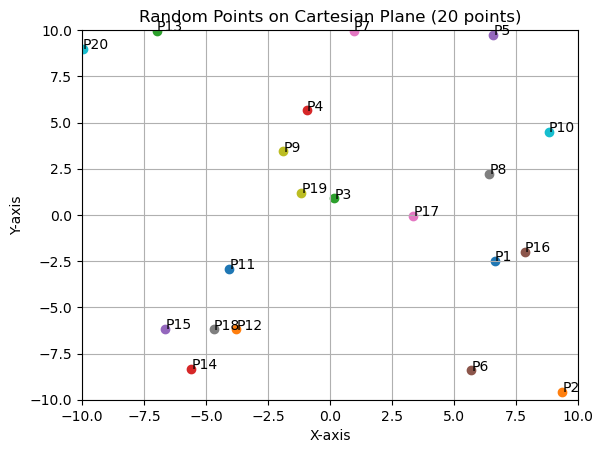

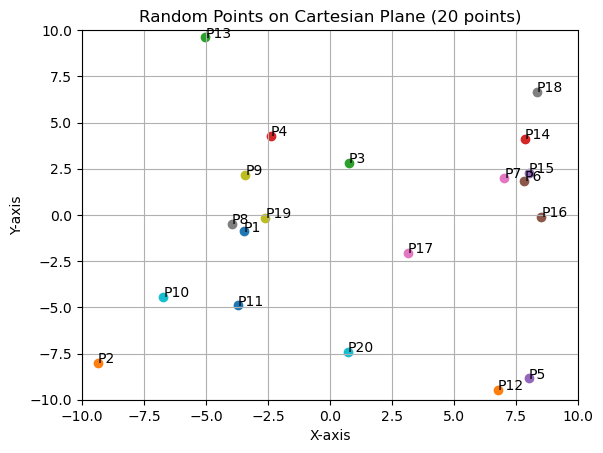

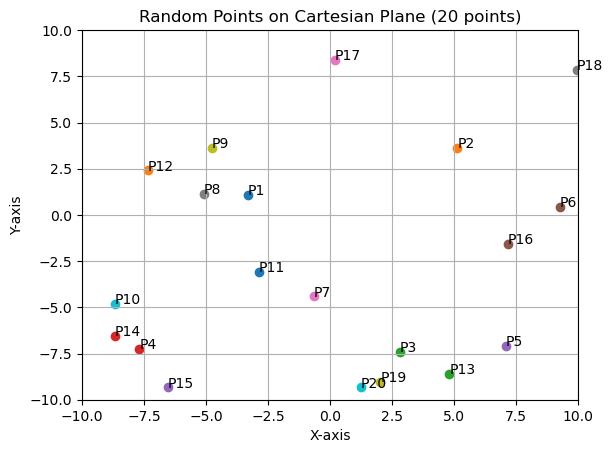

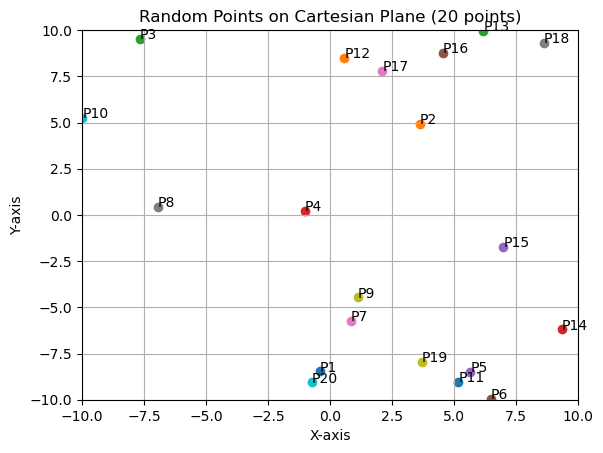

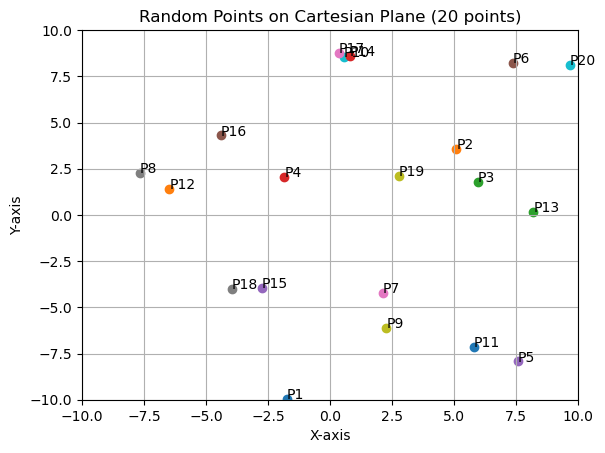

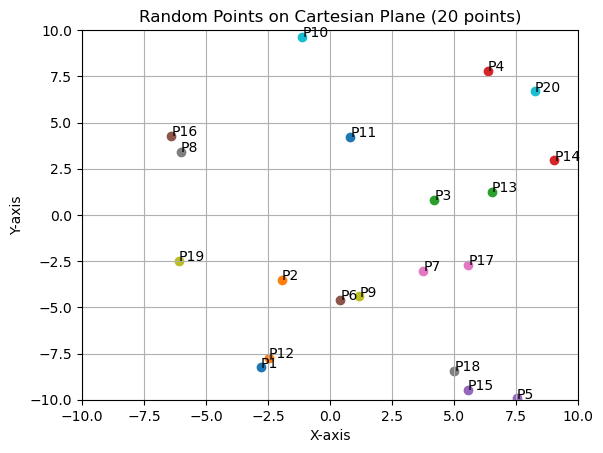

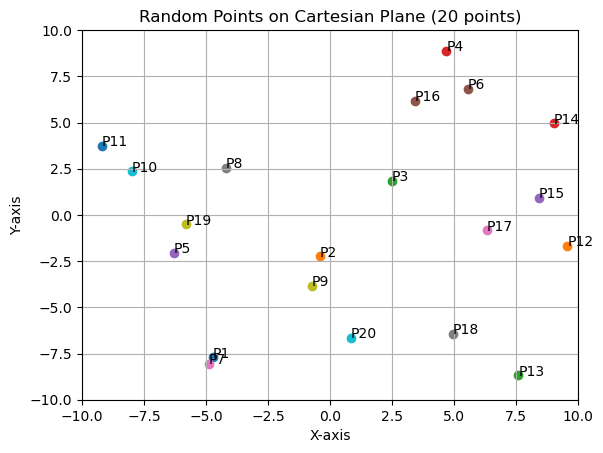

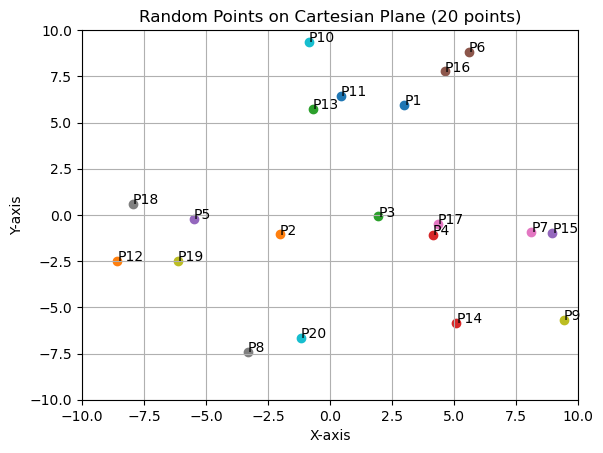

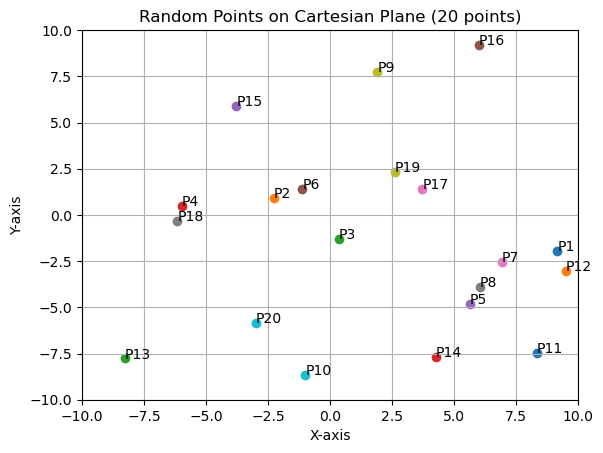

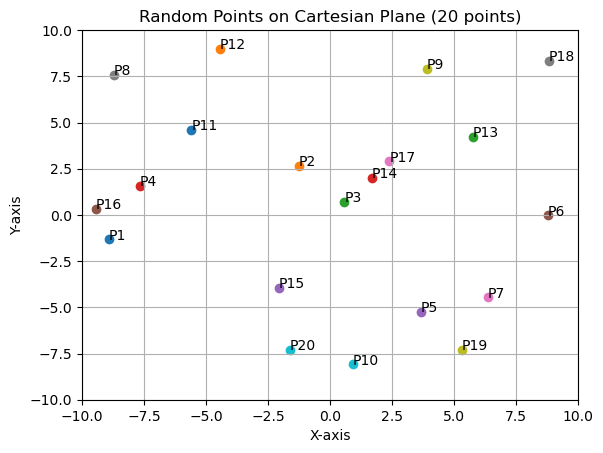

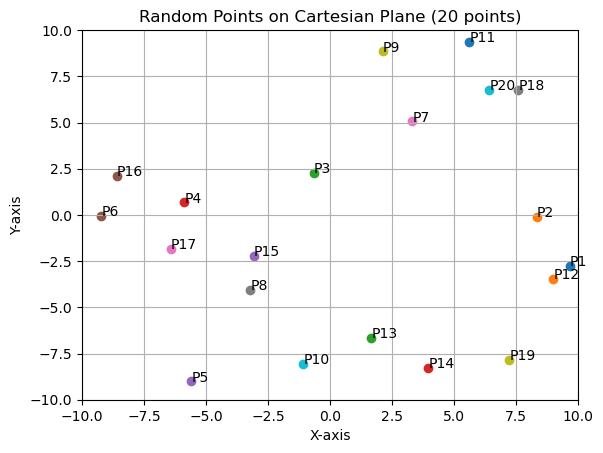

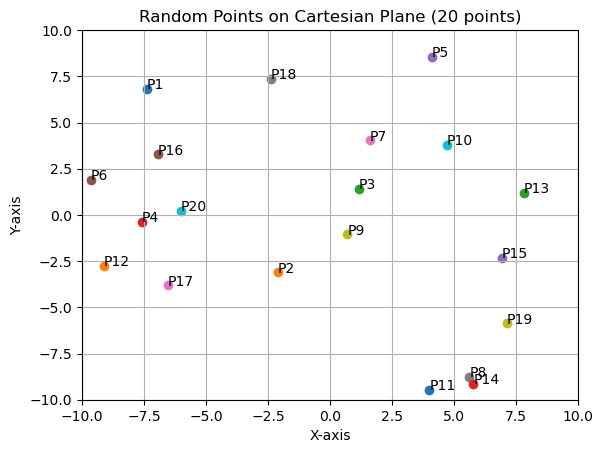

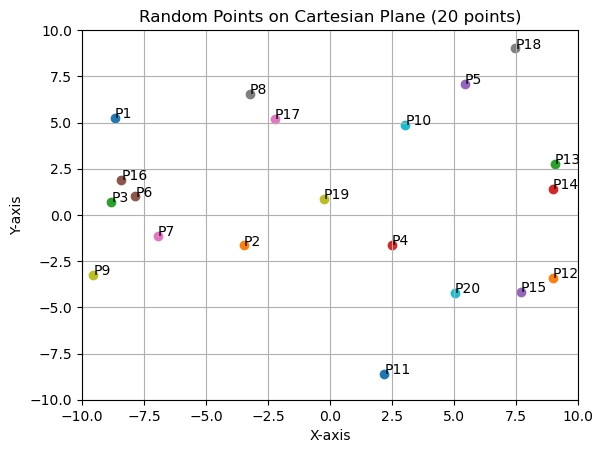

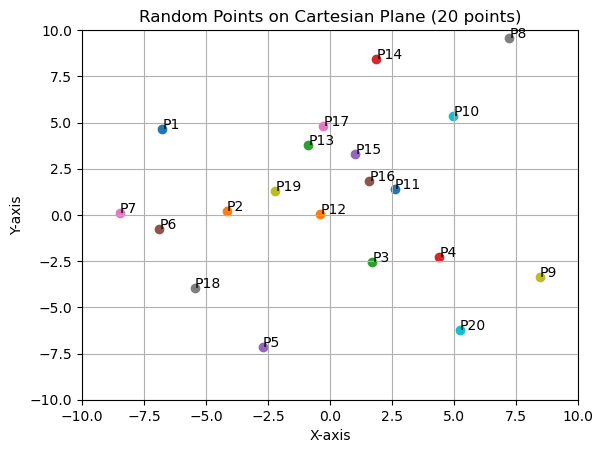

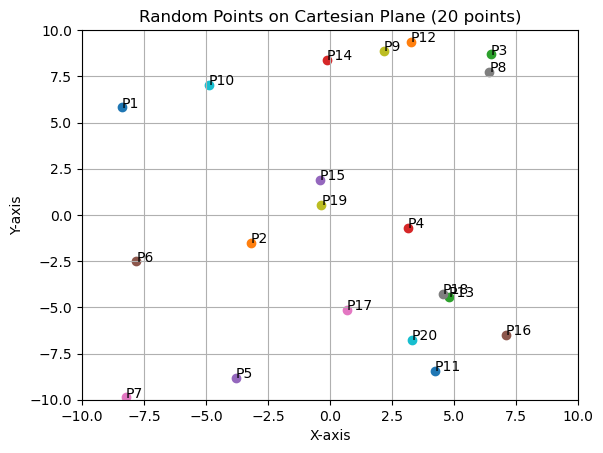

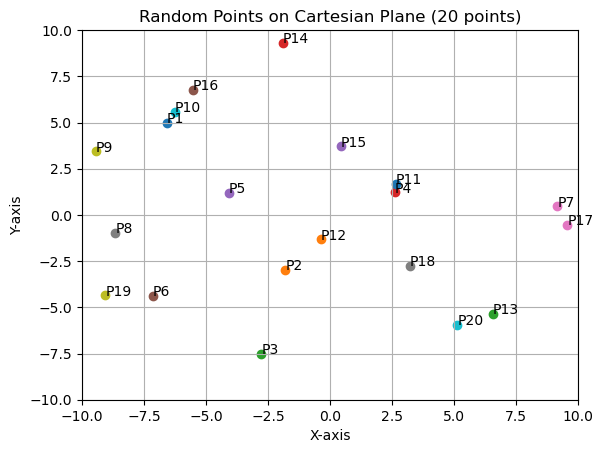

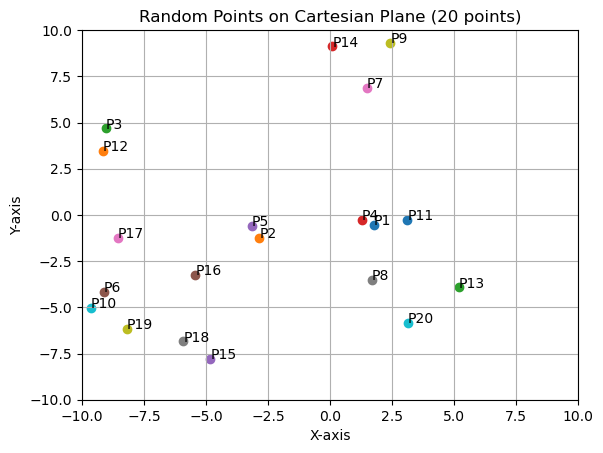

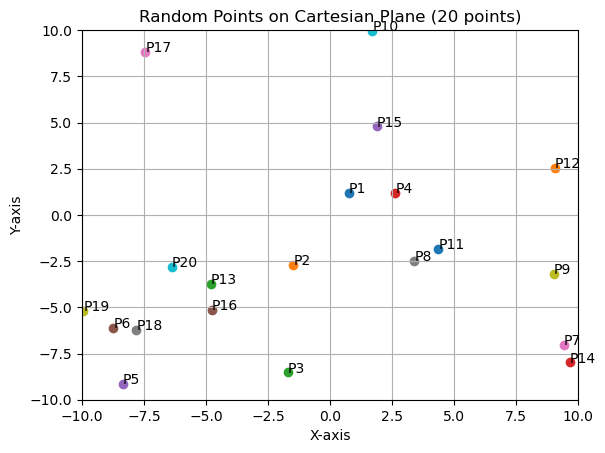

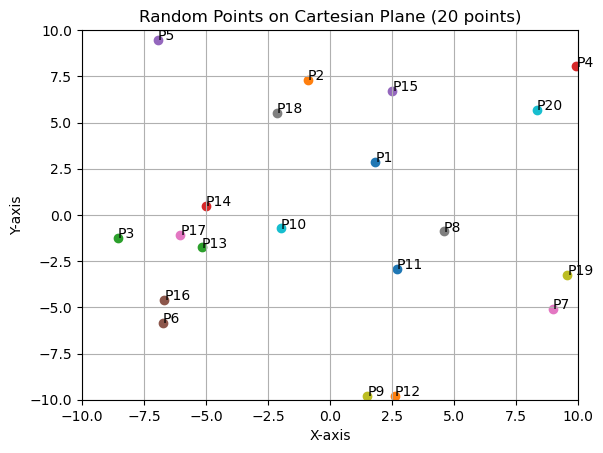

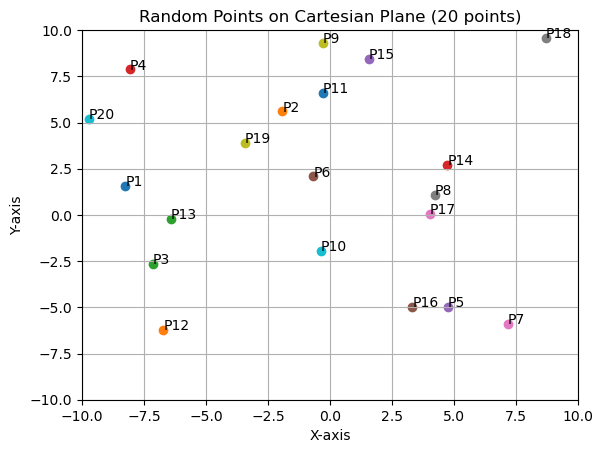

In [21]:
generate_configurations(20, 10)

#os.system(f"afplay {notification_sound}")

# Xtest,ytest = generate_data(2000)


# #os.system(f"afplay {notification_sound}")
# savedata(Xtest, f"InstanceTest.xlsx")
# savedata(ytest, f"SolutionTest.xlsx")

# generate_predictions(20)
# apply_algo(20) 

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.multioutput import MultiOutputClassifier
# from sklearn.model_selection import train_test_split

# X_set_1  = X0
# y_set_1  = y0
# # Define the classifier
# clf = MultiOutputClassifier(DecisionTreeClassifier(random_state=42, max_depth = 16, min_samples_leaf=4,
#                                            min_samples_split = 16))

# # Train the classifier
# clf.fit(X_set_1, y_set_1)

# score = clf.score(X_set_1, y_set_1)
# print('Train Accuracy:', score)

# score = clf.score(Xtest, ytest)
# print('Test Accuracy:', score)

# prediction = clf.predict(Xtest)

# accuracy_function(prediction, ytest)

In [ ]:
# savedata(prediction, "Prediction0.xlsx")

In [ ]:
print(accuracy_function(Sol1, ytest))
print(accuracy_function(Sol4, ytest))
print(accuracy_function(Sol8, ytest))
print(accuracy_function(Sol12, ytest))
print(accuracy_function(Sol16, ytest))
print(accuracy_function(Sol20, ytest))
# print(accuracy_function(Sol25, ytest))
# print(accuracy_function(Sol30, ytest))
# print(accuracy_function(Sol36, ytest))
# print(accuracy_function(Sol40, ytest))


# print(accuracy_function2(Sol1, ytest))
# print(accuracy_function2(Sol4, ytest))
# print(accuracy_function2(Sol8, ytest))
# print(accuracy_function2(Sol12, ytest))
# print(accuracy_function2(Sol16, ytest))
# print(accuracy_function2(Sol20, ytest))
# print(accuracy_function2(Sol25, ytest))
# print(accuracy_function2(Sol30, ytest))
# print(accuracy_function2(Sol36, ytest))
# print(accuracy_function2(Sol40, ytest))

In [ ]:
# # checking if value is greater than threshold 0.5
# y_pred_3_1 = np.where(y_pred_3_1 > 0.5, 1, 0)
# y_pred_3_2 = np.where(y_pred_3_2 > 0.5, 1, 0)
# y_pred_3_3 = np.where(y_pred_3_3 > 0.5, 1, 0)
# y_pred_3_4 = np.where(y_pred_3_4 > 0.5, 1, 0)
# y_pred_3_5 = np.where(y_pred_3_5 > 0.5, 1, 0)
# y_pred_3_6 = np.where(y_pred_3_6 > 0.5, 1, 0)
# y_pred_3_7 = np.where(y_pred_3_7 > 0.5, 1, 0)
# y_pred_3_8 = np.where(y_pred_3_8 > 0.5, 1, 0)
# y_pred_3_9 = np.where(y_pred_3_9 > 0.5, 1, 0)

# checking if value is greater than threshold 0.5




sol_alpha1 = np.where(sol_alpha1 > 0.5, 1, 0)
sol_alpha2 = np.where(sol_alpha2 > 0.5, 1, 0)
sol_alpha3 = np.where(sol_alpha3 > 0.5, 1, 0)
sol_alpha4 = np.where(sol_alpha4 > 0.5, 1, 0)
sol_alpha5 = np.where(sol_alpha5 > 0.5, 1, 0)
sol_alpha6 = np.where(sol_alpha6 > 0.5, 1, 0)
sol_alpha7 = np.where(sol_alpha7 > 0.5, 1, 0)
sol_alpha8 = np.where(sol_alpha8 > 0.5, 1, 0)
sol_alpha9 = np.where(sol_alpha9 > 0.5, 1, 0)



In [ ]:
for iteration in range(1, 10):
    
    prefix_x = "sol_alpha"

    
    prediction = prefix_x + str(iteration)


    savedata(globals()[prediction], f"Alpha_{iteration}Prediction_final.xlsx")

In [ ]:
accuracy_vec = []
accuracy_vec.append( accuracy_function(sol_alpha1, ytest))
accuracy_vec.append( accuracy_function(sol_alpha2, ytest))
accuracy_vec.append( accuracy_function(sol_alpha3, ytest))
accuracy_vec.append( accuracy_function(sol_alpha4, ytest))
accuracy_vec.append( accuracy_function(sol_alpha5, ytest))
accuracy_vec.append( accuracy_function(sol_alpha6, ytest))
accuracy_vec.append( accuracy_function(sol_alpha7, ytest))
accuracy_vec.append( accuracy_function(sol_alpha8, ytest))
accuracy_vec.append( accuracy_function(sol_alpha9, ytest))
accuracy_vec

# accuracy_vec = []
# accuracy_vec.append( accuracy_function2(sol_alpha1, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha2, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha3, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha4, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha5, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha6, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha7, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha8, ytest))
# accuracy_vec.append( accuracy_function2(sol_alpha9, ytest))
# accuracy_vec

In [ ]:
import matplotlib.pyplot as plt

alpha_vec = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,  0.9]

plt.plot(alpha_vec, accuracy_vec, marker='o')

# Adding labels and title
plt.xlabel('alpha')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. alpha values')
plt.savefig("plot.jpg")
# Display the plot
plt.show()

In [ ]:
# import pandas as pd

# opt_solution = pd.read_excel('/Users/rob/Desktop/Semester data/Sem 4 S23/CS6340 Prof Haas/Volunteer Project/Incremental Learning/experiments/1data/experiment_test/SolutionTest.xlsx')


# pred = pd.read_excel('/Users/rob/Desktop/Semester data/Sem 4 S23/CS6340 Prof Haas/Volunteer Project/Incremental Learning/experiments/1data/experiment_test/Prediction0.xlsx')


# elementwise_comparison = (pred == opt_solution)


# equal_counts = np.sum(elementwise_comparison, axis=1)

# equal_counts

# df = pd.concat([opt_solution, equal_counts], axis=1)

# df.to_excel("counts.xlsx", index=False)
os.system(f"afplay {notification_sound}")